# ISYE 6740 Project - NBA Players Career Trajectory Prediction
### Author: Daniel Jiang, Nafiz Haider

The National Basketball Association (NBA) is the premier professional basketball association in the world. This sport has produced numerous stars and all time greats. There have been even more players that have excelled in their first, or rookie, NBA seasons. However, we have seen that a more accurate prediction of a player’s trajectory is from their second season.

In [1]:
# load libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

import requests
import re
import csv
from bs4 import BeautifulSoup

In [2]:
def read_data(year):
    pass

def perform_clustering():
    pass

def plot_clusters():
    pass

"""
combines a player's data from different dataframes into one dataframe
"""
def merge_player_data():
    pass

#def PCA():
#    pass

In [3]:
def extract_bling_info(soup):    
    ALL_STAR, ALL_NBA = 0, 0
    bling = soup.find(id="bling")
    if bling:
        bling = bling.find_all('li')
        for b in bling:
            text = b.a.text
            if text.find("All Star") != -1:
                if text.find("x") != -1:
                    ALL_STAR = int(text.split("x")[0])
                else:
                    ALL_STAR = 1
            elif text.find("All-NBA") != -1:
                if text.find("x") != -1:
                    ALL_NBA = int(text.split("x")[0])
                else:
                    ALL_NBA = 1
    return ALL_STAR, ALL_NBA


def scrape_player_career(player_list):
    """
    given player ID, return player's career averages as pandas data frame
    """
    out_path = 'data/second_yrs_career_1990-2010.csv'
    csv_file = open(out_path, 'w')
    csv_writer = csv.writer(csv_file)
    features = ['GS_PCT','MP','FG','FGA','2P','2PA','3P','3PA','FT','FTA','ORB','DRB','TRB',
                    'AST','STL','BLK','TOV','PF','PTS','FG%','2P%','3P%','eFG%','FT%','ALL_STAR','ALL_NBA']
    csv_writer.writerow(features)
    for i in range(len(player_list)):
        player_id = player_list.iloc[i]

        URL = 'https://www.basketball-reference.com/players/{}/{}.html'.format(player_id[0], player_id)
        r = requests.get(URL)
        soup = BeautifulSoup(r.text, "html5lib")
        
        # extract desired columns from per-game table, career row 
        # note each has a try except due to missing data for some players
        # example: if player has never attempted a three point shot
        career_per = soup.find(id="per_game").tfoot.contents[0]
        
        try:
            G = career_per.contents[5].contents[0]
        except:
            G = 0
        try:
            GS = career_per.contents[6].contents[0]
        except:
            GS = 0            
        if int(G) == 0:
            GS_PCT = 0
        else:
            GS_PCT = round(int(GS)/int(G), 2)
            
        try:
            MP = career_per.contents[7].contents[0]
        except:
            MP = 0
        try:
            FG = career_per.contents[8].contents[0]
        except:
            FG = 0
        try:
            FGA = career_per.contents[9].contents[0]
        except:
            FGA = 0
        try:
            FG_PCT = career_per.contents[10].contents[0]
        except:
            FG_PCT = 0
        try:
            THREE_P = career_per.contents[11].contents[0]
        except:
            THREE_P = 0
        try:
            THREE_PA = career_per.contents[12].contents[0]
        except:
            THREE_PA = 0
        try:
            THREE_PCT = career_per.contents[13].contents[0]
        except:
            THREE_PCT = 0
        try:
            TWO_P = career_per.contents[14].contents[0]
        except:
            TWO_P = 0
        try:
            TWO_PA = career_per.contents[15].contents[0]
        except:
            TWO_PA = 0
        try:
            TWO_PCT = career_per.contents[16].contents[0]
        except:
            TWO_PCT = 0
        try:
            EFG_PCT = career_per.contents[17].contents[0]
        except:
            EFG_PCT = 0
        try:
            FT = career_per.contents[18].contents[0]
        except:
            FT = 0
        try:
            FTA = career_per.contents[19].contents[0]
        except:
            FTA = 0
        try:
            FT_PCT = career_per.contents[20].contents[0]
        except:
            FT_PCT = 0
        try:
            ORB = career_per.contents[21].contents[0]
        except:
            ORB = 0
        try:
            DRB = career_per.contents[22].contents[0]
        except:
            DRB = 0
        try:
            TRB = career_per.contents[23].contents[0]
        except:
            TRB = 0
        try:
            AST = career_per.contents[24].contents[0]
        except:
            AST = 0
        try:
            STL = career_per.contents[25].contents[0]
        except:
            STL = 0
        try:
            BLK = career_per.contents[26].contents[0]
        except:
            BLK = 0
        try:
            TOV = career_per.contents[27].contents[0]
        except:
            TOV = 0
        try:
            PF = career_per.contents[28].contents[0]
        except:
            PF = 0
        try:
            PTS = career_per.contents[29].contents[0]
        except:
            PTS = 0


        ALL_STAR, ALL_NBA = extract_bling_info(soup)            
        
        row = [GS_PCT,MP,FG,FGA,TWO_P,TWO_PA,THREE_P,THREE_PA,FT,FTA,ORB,DRB,TRB,
                    AST,STL,BLK,TOV,PF,PTS,FG_PCT,TWO_PCT,THREE_PCT,EFG_PCT,FT_PCT,ALL_STAR,ALL_NBA]
        csv_writer.writerow(row)

In [4]:
# All Current second year players data
second_yrs_current_season_pd = pd.read_csv('data/second_yrs_season_2019-2020.csv', header=1)
second_yrs_current_season = second_yrs_current_season_pd.to_numpy()[0:,8:32].astype(float)
second_yrs_current_season = np.nan_to_num(second_yrs_current_season)
#print(second_years_current)

# Second year players Season stats 1990-2010
second_yrs_1990_2010_season_pd = pd.read_csv('data/second_yrs_season_1990-2010.csv', header=1)
second_yrs_1990_2010_season = second_yrs_1990_2010_season_pd.to_numpy()[0:,8:32].astype(float)
second_yrs_1990_2010_season = np.nan_to_num(second_yrs_1990_2010_season)

#players list from second year players 1990-2010
player_list = second_yrs_1990_2010_season_pd.iloc[:,1]
player_list = player_list.str.split('\\').str[1]

In [5]:
# run in order to generate second_yrs_career_1990-2010.csv file
# note this is already generated
#scrape_player_career(player_list)

In [6]:
# Career data of players in second years 1990-2010 list
second_yrs_1990_2010_career_pd = pd.read_csv('data/second_yrs_career_1990-2010.csv')
second_yrs_1990_2010_career = second_yrs_1990_2010_career_pd.to_numpy()[0:,:24].astype(float)
second_yrs_1990_2010_career = np.nan_to_num(second_yrs_1990_2010_career)
all_stars = second_yrs_1990_2010_career_pd.to_numpy()[0:,24].astype(float)
all_nbas = second_yrs_1990_2010_career_pd.to_numpy()[0:,25].astype(float)
gs_percents = second_yrs_1990_2010_career_pd.to_numpy()[0:,0].astype(float)
#print(second_years_career)

In [7]:
# PCA Dimension reduction of career data
pca = PCA(n_components=5)
pca.fit(second_yrs_1990_2010_career)
#variance = pca.explained_variance_ratio_
reduced_representation_career_data = pca.transform(second_yrs_1990_2010_career)

# kmedoids clustering of career data into 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0).fit(reduced_representation_career_data)
career_labels = kmeans.labels_ #cluster labels
career_centers = kmeans.cluster_centers_ #cluster centers; interesting to see which players

# printing out lebron info
# this would be the "hall of fame" cluster
# 72 players part of this cluster
# 1046 in other clusters
# it is noisy but better with kmeans
print('------------------------------------------------------------------------------------')
print(player_list[798])
print('LEBRON Cluster: ' + str(career_labels[798]))
print('Number of cluster 3 players: ' + str(len((career_labels[career_labels == 3]))))
print('Players in other clusters: ' + str(len((career_labels[career_labels != 3]))))
print('------------------------------------------------------------------------------------')

# Assign "true" cluster assignment after based on things we can look up.
# i.e. % of games started, all star appearances, all nba appearances, etc.
# Find accuracy of results
#actual_labels = 
#false_classification_rate = np.count_nonzero(career_labels==actual_labels)/len(career_labels)


# find averages of second year performance per cluster
second_year_cluster_averages = np.zeros((len(set(career_labels)), len(second_yrs_1990_2010_season[0])))
career_all_stars_averages = np.zeros(len(set(career_labels)))
career_all_nba_averages = np.zeros(len(set(career_labels)))
gs_percents_averages = np.zeros(len(set(career_labels)))
for i in range(len(set(career_labels))):
    indices = np.where(career_labels == i)[0]
    cluster_average = np.average(second_yrs_1990_2010_season[indices], axis=0)
    all_stars_average = np.average(all_stars[indices])
    all_nba_average = np.average(all_nbas[indices])
    gs_percents_average = np.average(gs_percents[indices])
    second_year_cluster_averages[i] = cluster_average
    career_all_stars_averages[i] = all_stars_average
    career_all_nba_averages[i] = all_nba_average
    gs_percents_averages[i] = gs_percents_average*100

print('------------------------------------------------------------------------------------')
print('ALL STAR APPEARANCES PER CLUSTER:')
print(career_all_stars_averages)
print('ALL NBA APPEARANCES PER CLUSTER:')
print(career_all_nba_averages)
print('PERCENTAGE OF GAMES STARTED PER CLUSTER:')
print(gs_percents_averages)
print('------------------------------------------------------------------------------------')

# assign projected cluster label to current second year players
# using euclidean distance measurement to averages
distances = np.array(pairwise_distances(second_yrs_current_season, second_year_cluster_averages, metric='euclidean'))
second_year_current_labels = np.argmin(distances, axis=1)

# making sure luka is clustered with lebron lol
# 6 players in lebron cluster, 72 not
print('------------------------------------------------------------------------------------')
print('LUKA CLUSTER: ' + str(second_year_current_labels[24]))
print('Number of cluster 3 players: ' + str(len((second_year_current_labels[second_year_current_labels == 3]))))
print('Players in other clusters: ' + str(len((second_year_current_labels[second_year_current_labels != 3]))))
print('------------------------------------------------------------------------------------')


------------------------------------------------------------------------------------
jamesle01
LEBRON Cluster: 3
Number of cluster 3 players: 72
Players in other clusters: 1046
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
ALL STAR APPEARANCES PER CLUSTER:
[0.         0.82781457 0.         5.11111111 0.0754717  0.        ]
ALL NBA APPEARANCES PER CLUSTER:
[0.         0.32450331 0.         3.34722222 0.02830189 0.        ]
PERCENTAGE OF GAMES STARTED PER CLUSTER:
[ 3.12612613 68.59602649 25.79661017 88.29166667 43.25       13.04888889]
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
LUKA CLUSTER: 3
Number of cluster 3 players: 6
Players in other clusters: 72
------------------------------------------------------------------------------------


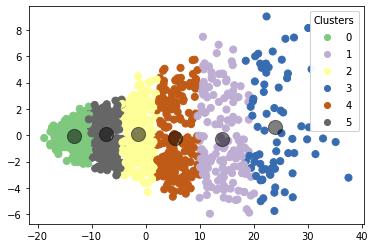

In [8]:
# Graph clusters with just two features
# due to human lack of 5D imagination
fig, ax = plt.subplots()
scatter = ax.scatter(reduced_representation_career_data[:, 0], reduced_representation_career_data[:, 1], c=career_labels, s=50, cmap='Accent')
# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend)
plt.scatter(career_centers[:, 0], career_centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()
